In [1]:
library(GDINA);
library(bnlearn);
library(caret)
library(bayestestR)
library(pROC)

GDINA R Package (version 2.9.3; 2022-08-17)
For tutorials, see https://wenchao-ma.github.io/GDINA



Attaching package: ‘bnlearn’


The following object is masked from ‘package:GDINA’:

    score


Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:bayestestR’:

    auc, ci


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [173]:
fulldat<-data.frame(lapply(fulldat,factor))
fulldat

I001,I002,I003,I004,I005,I006,I007,I008,I009,I010,⋯,I016,I017,I018,I019,I020,V21,V22,V23,V24,V25
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,0,1,1,0,1,1,⋯,1,0,1,0,0,0,1,1,0,0
1,1,0,1,0,0,0,1,1,1,⋯,0,1,1,1,0,0,1,1,1,0
1,0,0,1,1,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,1,1
0,1,1,0,0,1,0,1,1,1,⋯,1,1,0,1,0,0,1,1,1,1
0,0,0,0,1,0,0,0,0,1,⋯,1,0,0,1,0,0,0,0,0,1
1,0,1,1,1,1,1,0,0,0,⋯,1,0,1,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,1,0,⋯,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,⋯,0,1,1,0,0,1,1,0,0,1
0,0,1,1,1,1,0,0,1,0,⋯,1,0,1,0,1,0,0,1,1,1


In [2]:
sigma <- matrix(rep(0.3, times=25), ncol=5)
diag(sigma) <- 1
QMat <- read.csv("q.csv")
guess <- rep(0.3, nrow(QMat));

simdat <- CDM::sim.din(N=1000,
                        QMat, guess = guess, slip = guess,
                        Sigma=sigma, rule="DINA")

obs<-simdat$dat
colnames(obs) <- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")
obsdf<- as.data.frame(lapply(as.data.frame(obs),factor))


## This block needs some code cleaning
fulldat <- cbind(simdat$dat, simdat$alpha)
colnames(fulldat)<- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20",
                    "a1", "a2","a3","a4","a5")
fulldat[, colnames(fulldat)] = lapply(fulldat[, colnames(fulldat)], as.factor)
fdf <- as.data.frame(fulldat)
factoreddata <- data.frame(lapply(fdf, factor))

rownames(QMat) <- colnames(obsdf)
colnames(QMat) <- c("a1", "a2", "a3", "a4", "a5")
items <- rownames(QMat)

skills <- colnames(QMat)

itemnames <- rownames(QMat)
itemcomb <- t(combn(itemnames,2))

In [174]:
itemcomb

x1,x2
x1,x3
x1,x4
x1,x5
x1,x6
x1,x7
x1,x8
x1,x9
x1,x10
x1,x11
x1,x12


In [117]:
check_ind <- function(obsdf, factoreddata, fulldat, thresh, pval){
    ci_x2 = list()
    ci_mi = list()
    ci_aic = list()
    ci_bic = list()
    ci_bf = list()

    # Testing when link is present
    # Items that share an attribute should be correlated
    for (i in 1:ncol(QMat)){
        corr_items <-items[as.logical(QMat[,i])]
        test_set <- as.data.frame(t(combn(corr_items,2)))

        for (i in 1:nrow(test_set)){
        
        ####### Chi-Sq Test
        testres_x2  <- ci.test(test_set$V1[i], test_set$V2[i], data =obsdf, test = "x2")
            if (testres_x2$p.val <= pval){
            # The null hypothesis that the given set of nodes are independent
            # When we have p <0.05, we reject the null
                dep <- "1"
            }
            else {
                dep <- "0"
            }
        ci_x2 <- rbind(ci_x2,c("1",dep))
        
        ####### Mutual Information Test
        testres_mi  <- ci.test(test_set$V1[i], test_set$V2[i], data =obsdf, test = "mi")
             if (testres_mi$p.val <= pval){
            # The null hypothesis that the given set of nodes are independent
            # When we have p <0.05, we reject the null
                dep <- "1"
            }
            else {
                dep <- "0"
            }
        ci_mi <- rbind(ci_mi,c("1",dep))

        m1 <- glm(get(test_set$V1[i])~ 1 + get(test_set$V2[i]), data = as.data.frame(obs), family = "binomial")
        m2 <- glm(get(test_set$V1[i])~ 1, data = as.data.frame(obs), family = "binomial")
        
        # AIC Model Selection 
        m1aic <- AIC(m1)
        m2aic <- AIC(m2)
        bf_aic <- abs(m2aic) - abs(m1aic)
        e_aic <- exp(0.5* (m2aic - m1aic))

        if (e_aic > thresh){
            # The null hypothesis that the given set of nodes are independent
            # When we have p <0.05, we reject the null
                dep <- "1"
            }
            else {
                dep <- "0"
            }
        ci_aic <- rbind(ci_aic,c("1",dep))

        # BIC Model Selection 
        m1bic <- BIC(m1)
        m2bic <- BIC(m2)
        bf_bic <- abs(m2bic) - abs(m1bic)
        bf <- bic_to_bf(m2bic, denominator = m1bic)
        if (m1bic < m2bic){
            # The null hypothesis that the given set of nodes are independent
            # When we have p <0.05, we reject the null
                dep <- "1"
            }
            else {
                dep <- "0"
            }
        ci_bic <- rbind(ci_bic,c("1",dep))

        if (bf < thresh){
            # The null hypothesis that the given set of nodes are independent
            # When we have p <0.05, we reject the null
                dep <- "1"
            }
            else {
                dep <- "0"
            }
        ci_bf <- rbind(ci_bf,c("1",dep))
        } # end of nrow(test_set)
    }
    # Testing when link is absent 
    # Theory says obs are independent after we condition on the common attribute  
    for (i in 1:nrow(itemcomb)){
        indc <- as.logical(QMat[itemcomb[i,][1],] * QMat[itemcomb[i,][2],])

        ####### Chi-Sq Test
        tmp_x2 <- ci.test(itemcomb[i,][1], itemcomb[i,][2],skills[indc], 
                    test = "x2", data=factoreddata)
        if(tmp_x2$p.val <= pval){
            dep <- "1" 
        }
        else {
        dep <-"0"
        }
        ci_x2 <- rbind(ci_x2,c("0",dep))
        
        ####### Mutual Information Test 
        tmp_mi <- ci.test(itemcomb[i,][1], itemcomb[i,][2],skills[indc], 
                    test = "mi", data=factoreddata)
          if(tmp_mi$p.val <= pval){
            dep <- "1" 
        }
        else {
        dep <-"0"
        }
        ci_mi <- rbind(ci_mi,c("0",dep))

        ###### AIC 
        cond_set <- skills[indc]
        features <- append(itemcomb[i,][2], cond_set)
        features1 <- append(features,1)
        target <- itemcomb[i,][1]
        rhs<- paste(features1,collapse = "+")
        f <- as.formula(paste(target, rhs, sep ="~"))
        m2 <- glm(f, data = as.data.frame(fulldat), family = "binomial")


        features0 <- append(cond_set,1)
        rhs0<- paste(features0,collapse = "+")
        f0 <- as.formula(paste(target, rhs0, sep ="~"))
        m1 <- glm(f0, data = as.data.frame(fulldat), family = "binomial")
        
        # Here we are testing M1 [P(X1|skill)] against M2 [P(X1|X2,skill)]
        # If bayesfactor prefer M1 over M2, that means X1 & X2 are independent given the common attribute
        m1aic <- AIC(m1)
        m2aic <- AIC(m2)
        bf_aic <- abs(m2aic) - abs(m1aic)
        e_aic <- exp(0.5* (m2aic - m1aic))
        if(e_aic < thresh){
            dep <- "1" 
        }
        else {
        dep <-"0"
        }
        ci_aic <- rbind(ci_aic,c("0",dep))

        ###### BIC
        m1bic <- BIC(m1)
        m2bic <- BIC(m2)
        bf_bic <- abs(m2bic) - abs(m1bic)
        bf <- bic_to_bf(m2bic, denominator = m1bic)
        if(m2bic < m1bic){
            dep <- "1" 
        }
        else {
        dep <-"0"
        }
        ci_bic <- rbind(ci_bic,c("0",dep))

        if(bf > thresh){
            dep <- "1" 
        }
        else {
        dep <-"0"
        }
        ci_bf <- rbind(ci_bf,c("0",dep))
    }
    ci_test = list(ci_x2, ci_mi, ci_aic, ci_bic, ci_bf)
    return(ci_test)
}

res = as.data.frame(a[1])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_x2 <- data.frame(trues,preds)
colnames(cdf_x2) <- c("true_val", "pred_val")

res = as.data.frame(a[2])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_mi <- data.frame(trues,preds)
colnames(cdf_mi) <- c("true_val", "pred_val")

res = as.data.frame(a[3])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_aic <- data.frame(trues,preds)
colnames(cdf_aic) <- c("true_val", "pred_val")

res = as.data.frame(a[4])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_bic <- data.frame(trues,preds)
colnames(cdf_bic) <- c("true_val", "pred_val")

cf_x2 <- confusionMatrix(data=cdf_x2$pred_val, reference = cdf_x2$true_val)
cf_mi <- confusionMatrix(data=cdf_mi$pred_val, reference = cdf_mi$true_val)
cf_bic <- confusionMatrix(data=cdf_bic$pred_val, reference = cdf_bic$true_val)
cf_aic <- confusionMatrix(data=cdf_aic$pred_val, reference = cdf_aic$true_val)

cf_aic

attributes(cf_aic)

attributes(cf_aic$byClass)

aic_sensitivity <- cf_aic$byClass[1]
aic_specificity <- cf_aic$byClass[2]
aic_accuracy <- cf_aic$overall[1]
aic_roc <- roc(as.numeric(cdf_aic$true_val), as.numeric(cdf_aic$pred_val))
aic_auc <- auc(aic_roc)

bic_sensitivity <- cf_bic$byClass[1]
bic_specificity <- cf_bic$byClass[2]
bic_accuracy <- cf_bic$overall[1]
bic_roc <- roc(as.numeric(cdf_bic$true_val), as.numeric(cdf_bic$pred_val))
bic_auc <- auc(bic_roc)

x2_sensitivity <- cf_x2$byClass[1]
x2_specificity <- cf_x2$byClass[2]
x2_accuracy <- cf_x2$overall[1]
x2_roc <- roc(as.numeric(cdf_x2$true_val), as.numeric(cdf_x2$pred_val))
x2_auc <- auc(x2_roc)

mi_sensitivity <- cf_mi$byClass[1]
mi_specificity <- cf_mi$byClass[2]
mi_accuracy <- cf_mi$overall[1]
mi_roc <- roc(as.numeric(cdf_mi$true_val), as.numeric(cdf_mi$pred_val))
mi_auc <- auc(x2_roc)

In [118]:
run_sim <- function(nsubj,thresh, pval){
aic_accuracy = list()
aic_sensitivity = list()
aic_specificity = list()
aic_roc = list()
aic_roc$sensitivities = list()
aic_roc$specificities = list()
aic_auc = list()
bic_accuracy = list()
bic_sensitivity = list()
bic_specificity = list()
bic_roc = list()
bic_roc$sensitivities = list()
bic_roc$specificities = list()
bic_auc = list()

x2_accuracy = list()
x2_sensitivity = list()
x2_specificity = list()
x2_roc = list()
x2_roc$sensitivities = list()
x2_roc$specificities = list()
x2_auc = list()

mi_accuracy = list()
mi_sensitivity = list()
mi_specificity = list()
mi_roc = list()
mi_roc$sensitivities = list()
mi_roc$specificities = list()
mi_auc = list()

bf_accuracy = list()
bf_sensitivity = list()
bf_specificity = list()
bf_roc = list()
bf_roc$sensitivities = list()
bf_roc$specificities = list()
bf_auc = list()


for (i in 1:10){

simdat <- CDM::sim.din(N=nsubj,
                        QMat, guess = guess, slip = guess,
                        Sigma=sigma, rule="DINA")

obs<-simdat$dat
colnames(obs) <- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")
obsdf<- as.data.frame(lapply(as.data.frame(obs),factor))


## This block needs some code cleaning
fulldat <- cbind(simdat$dat, simdat$alpha)
colnames(fulldat)<- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20",
                    "a1", "a2","a3","a4","a5")
#fulldat[, colnames(fulldat)] = lapply(fulldat[, colnames(fulldat)], as.factor)
fdf <- as.data.frame(fulldat)
factoreddata <- data.frame(lapply(fdf, factor))

rownames(QMat) <- colnames(obsdf)
colnames(QMat) <- c("a1", "a2", "a3", "a4", "a5")
items <- rownames(QMat)

skills <- colnames(QMat)

itemnames <- rownames(QMat)
itemcomb <- t(combn(itemnames,2))

a = check_ind(obsdf, factoreddata, fulldat, thresh, pval)

res = as.data.frame(a[1])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_x2 <- data.frame(trues,preds)
colnames(cdf_x2) <- c("true_val", "pred_val")

res = as.data.frame(a[2])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_mi <- data.frame(trues,preds)
colnames(cdf_mi) <- c("true_val", "pred_val")

res = as.data.frame(a[3])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_aic <- data.frame(trues,preds)
colnames(cdf_aic) <- c("true_val", "pred_val")

res = as.data.frame(a[4])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_bic <- data.frame(trues,preds)
colnames(cdf_bic) <- c("true_val", "pred_val")

res = as.data.frame(a[5])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_bf <- data.frame(trues,preds)
colnames(cdf_bf) <- c("true_val", "pred_val")


cf_x2 <- confusionMatrix(data=cdf_x2$pred_val, reference = cdf_x2$true_val)
cf_mi <- confusionMatrix(data=cdf_mi$pred_val, reference = cdf_mi$true_val)
cf_bic <- confusionMatrix(data=cdf_bic$pred_val, reference = cdf_bic$true_val)
cf_aic <- confusionMatrix(data=cdf_aic$pred_val, reference = cdf_aic$true_val)
cf_bf <- confusionMatrix(data=cdf_bf$pred_val, reference = cdf_bf$true_val)

aic_sensitivity <- rbind(aic_sensitivity, cf_aic$byClass[1])
aic_specificity <- rbind(aic_specificity, cf_aic$byClass[2])
aic_accuracy <- rbind(aic_accuracy, cf_aic$overall[1])
aic_roc_temp <- roc(as.numeric(cdf_aic$true_val), as.numeric(cdf_aic$pred_val))
aic_roc$sensitivities <- rbind(aic_roc$sensitivities, aic_roc_temp$sensitivities)
aic_roc$specificities <- rbind(aic_roc$specificities, aic_roc_temp$specificities)
aic_auc <- rbind(aic_auc,auc(aic_roc_temp))

bic_sensitivity <- rbind(bic_sensitivity, cf_bic$byClass[1])
bic_specificity <- rbind(bic_specificity, cf_bic$byClass[2])
bic_accuracy <- rbind(bic_accuracy, cf_bic$overall[1])
bic_roc_temp <- roc(as.numeric(cdf_bic$true_val), as.numeric(cdf_bic$pred_val))
bic_roc$sensitivities <- rbind(bic_roc$sensitivities, bic_roc_temp$sensitivities)
bic_roc$specificities <- rbind(bic_roc$specificities, bic_roc_temp$specificities)
bic_auc <- rbind(bic_auc, auc(bic_roc_temp))

x2_sensitivity <- rbind(x2_sensitivity, cf_x2$byClass[1])
x2_specificity <- rbind(x2_specificity, cf_x2$byClass[2])
x2_accuracy <- rbind(x2_accuracy, cf_x2$overall[1])
x2_roc_temp <- roc(as.numeric(cdf_x2$true_val), as.numeric(cdf_x2$pred_val))
x2_roc$sensitivities <- rbind(x2_roc$sensitivities, x2_roc_temp$sensitivities)
x2_roc$specificities <- rbind(x2_roc$specificities, x2_roc_temp$specificities)
x2_auc <- rbind(x2_auc, auc(x2_roc_temp))

mi_sensitivity <- rbind(mi_sensitivity, cf_mi$byClass[1])
mi_specificity <- rbind(mi_specificity, cf_mi$byClass[2])
mi_accuracy <- rbind(mi_accuracy, cf_mi$overall[1])
mi_roc_temp <- roc(as.numeric(cdf_mi$true_val), as.numeric(cdf_mi$pred_val))
mi_roc$sensitivities <- rbind(mi_roc$sensitivities, mi_roc_temp$sensitivities)
mi_roc$specificities <- rbind(mi_roc$specificities, mi_roc_temp$specificities)
mi_auc <- rbind(mi_auc, auc(mi_roc_temp))

bf_sensitivity <- rbind(bf_sensitivity, cf_bf$byClass[1])
bf_specificity <- rbind(bf_specificity, cf_bf$byClass[2])
bf_accuracy <- rbind(bf_accuracy, cf_bf$overall[1])
bf_roc_temp <- roc(as.numeric(cdf_bf$true_val), as.numeric(cdf_bf$pred_val))
bf_roc$sensitivities <- rbind(bf_roc$sensitivities, bf_roc_temp$sensitivities)
bf_roc$specificities <- rbind(bf_roc$specificities, bf_roc_temp$specificities)
bf_auc <- rbind(bf_auc, auc(bf_roc_temp))
}

mi_accuracy_mean <- mean(as.numeric(mi_accuracy), na.rm=TRUE)
mi_sensitivity_mean <- mean(as.numeric(mi_sensitivity), na.rm=TRUE)
mi_specificity_mean <- mean(as.numeric(mi_specificity), na.rm=TRUE)
mi_roc_mean_sen  <- c(mean(as.numeric(mi_roc$sensitivities[,1])),
                        mean(as.numeric(mi_roc$sensitivities[,2])),
                        mean(as.numeric(mi_roc$sensitivities[,3])))
mi_roc_mean_spe  <- c(mean(as.numeric(mi_roc$specificities[,1])),
                        mean(as.numeric(mi_roc$specificities[,2])),
                        mean(as.numeric(mi_roc$specificities[,3])))
mi_auc_mean <- mean(as.numeric(mi_auc), na.rm=TRUE)

x2_accuracy_mean <- mean(as.numeric(x2_accuracy), na.rm=TRUE)
x2_sensitivity_mean <- mean(as.numeric(x2_sensitivity), na.rm=TRUE)
x2_specificity_mean <- mean(as.numeric(x2_specificity), na.rm=TRUE)
x2_roc_mean_sen  <- c(mean(as.numeric(x2_roc$sensitivities[,1])),
                        mean(as.numeric(x2_roc$sensitivities[,2])),
                        mean(as.numeric(x2_roc$sensitivities[,3])))
x2_roc_mean_spe  <- c(mean(as.numeric(x2_roc$specificities[,1])),
                        mean(as.numeric(x2_roc$specificities[,2])),
                        mean(as.numeric(x2_roc$specificities[,3])))
x2_auc_mean <- mean(as.numeric(x2_auc), na.rm=TRUE)


aic_accuracy_mean <- mean(as.numeric(aic_accuracy), na.rm=TRUE)
aic_sensitivity_mean <- mean(as.numeric(aic_sensitivity), na.rm=TRUE)
aic_specificity_mean <- mean(as.numeric(aic_specificity), na.rm=TRUE)
aic_roc_mean_sen  <- c(mean(as.numeric(aic_roc$sensitivities[,1])),
                        mean(as.numeric(aic_roc$sensitivities[,2])),
                        mean(as.numeric(aic_roc$sensitivities[,3])))
aic_roc_mean_spe  <- c(mean(as.numeric(aic_roc$specificities[,1])),
                        mean(as.numeric(aic_roc$specificities[,2])),
                        mean(as.numeric(aic_roc$specificities[,3])))
aic_auc_mean <- mean(as.numeric(aic_auc), na.rm=TRUE)


bic_accuracy_mean <- mean(as.numeric(bic_accuracy), na.rm=TRUE)
bic_sensitivity_mean <- mean(as.numeric(bic_sensitivity), na.rm=TRUE)
bic_specificity_mean <- mean(as.numeric(bic_specificity), na.rm=TRUE)
bic_roc_mean_sen  <- c(mean(as.numeric(bic_roc$sensitivities[,1])),
                        mean(as.numeric(bic_roc$sensitivities[,2])),
                        mean(as.numeric(bic_roc$sensitivities[,3])))
bic_roc_mean_spe  <- c(mean(as.numeric(bic_roc$specificities[,1])),
                        mean(as.numeric(bic_roc$specificities[,2])),
                        mean(as.numeric(bic_roc$specificities[,3])))
bic_auc_mean <- mean(as.numeric(bic_auc), na.rm=TRUE)

bf_accuracy_mean <- mean(as.numeric(bf_accuracy), na.rm=TRUE)
bf_sensitivity_mean <- mean(as.numeric(bf_sensitivity), na.rm=TRUE)
bf_specificity_mean <- mean(as.numeric(bf_specificity), na.rm=TRUE)
bf_roc_mean_sen  <- c(mean(as.numeric(bf_roc$sensitivities[,1])),
                        mean(as.numeric(bf_roc$sensitivities[,2])),
                        mean(as.numeric(bf_roc$sensitivities[,3])))
bf_roc_mean_spe  <- c(mean(as.numeric(bf_roc$specificities[,1])),
                        mean(as.numeric(bf_roc$specificities[,2])),
                        mean(as.numeric(bf_roc$specificities[,3])))
bf_auc_mean <- mean(as.numeric(bf_auc), na.rm=TRUE)

accuracy_scores = list(aic_accuracy_mean, bic_accuracy_mean, mi_accuracy_mean, x2_accuracy_mean, bf_accuracy_mean)
sensitivity_scores = list(aic_sensitivity_mean, bic_sensitivity_mean, mi_sensitivity_mean, x2_sensitivity_mean, bf_sensitivity_mean)
specificity_scores = list(aic_specificity_mean, bic_specificity_mean, mi_specificity_mean, x2_specificity_mean, bf_specificity_mean)
auc_scores = list(aic_auc_mean, bic_auc_mean, mi_auc_mean, x2_auc_mean, bf_auc_mean)
roc_scores = list(c(aic_roc_mean_sen, aic_roc_mean_spe),
                    c(bic_roc_mean_sen, bic_roc_mean_spe),
                    c(mi_roc_mean_sen,mi_roc_mean_spe),
                    c(x2_roc_mean_sen, x2_roc_mean_spe),
                    c(bf_roc_mean_sen, bf_roc_mean_spe))
results = list(accuracy_scores, sensitivity_scores, specificity_scores, auc_scores, roc_scores)
return(results)
}

0.001, 0.005,0.01,.05,0.1,0.2,0.3, 0.4, 0.5, 0.7, 0.8, 0.9

In [120]:
#a50_001 = run_sim(50, 0.001, 0.001)
a50_005 = run_sim(50, 0.005, 0.005)
a50_01 = run_sim(50, 0.01, 0.01)
a50_05 = run_sim(50, 0.05, 0.05)
a50_1 = run_sim(50, 0.1, 0.1)
a50_2 = run_sim(50, 0.2, 0.2)
a50_3 = run_sim(50, 0.3, 0.3)
a50_4 = run_sim(50, 0.4, 0.4)
a50_5 = run_sim(50, 0.5, 0.5)
a50_6 = run_sim(50, 0.6, 0.6)
a50_7 = run_sim(50, 0.7, 0.7)
a50_8 = run_sim(50, 0.8, 0.8)
a50_9 = run_sim(50, 0.9, 0.9)

#a50_001 = run_sim(50, 0.001, 0.001)


Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Warning mess

In [137]:
a100_005 = run_sim(100, 0.005, 0.005)
a100_01 = run_sim(100, 0.01, 0.01)
a100_05 = run_sim(100, 0.05, 0.05)
a100_1 = run_sim(100, 0.1, 0.1)
a100_2 = run_sim(100, 0.2, 0.2)
a100_3 = run_sim(100, 0.3, 0.3)
a100_4 = run_sim(100, 0.4, 0.4)
a100_5 = run_sim(100, 0.5, 0.5)
a100_6 = run_sim(100, 0.6, 0.6)
a100_7 = run_sim(100, 0.7, 0.7)
a100_8 = run_sim(100, 0.8, 0.8)
a100_9 = run_sim(100, 0.9, 0.9)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [138]:
a200_005 = run_sim(200, 0.005, 0.005)
a200_01 = run_sim(200, 0.01, 0.01)
a200_05 = run_sim(200, 0.05, 0.05)
a200_1 = run_sim(200, 0.1, 0.1)
a200_2 = run_sim(200, 0.2, 0.2)
a200_3 = run_sim(200, 0.3, 0.3)
a200_4 = run_sim(200, 0.4, 0.4)
a200_5 = run_sim(200, 0.5, 0.5)
a200_6 = run_sim(200, 0.6, 0.6)
a200_7 = run_sim(200, 0.7, 0.7)
a200_8 = run_sim(200, 0.8, 0.8)
a200_9 = run_sim(200, 0.9, 0.9)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [139]:
a500_005 = run_sim(500, 0.005, 0.005)
a500_01 = run_sim(500, 0.01, 0.01)
a500_05 = run_sim(500, 0.05, 0.05)
a500_1 = run_sim(500, 0.1, 0.1)
a500_2 = run_sim(500, 0.2, 0.2)
a500_3 = run_sim(500, 0.3, 0.3)
a500_4 = run_sim(500, 0.4, 0.4)
a500_5 = run_sim(500, 0.5, 0.5)
a500_6 = run_sim(500, 0.6, 0.6)
a500_7 = run_sim(500, 0.7, 0.7)
a500_8 = run_sim(500, 0.8, 0.8)
a500_9 = run_sim(500, 0.9, 0.9)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [140]:
a1000_005 = run_sim(1000, 0.005, 0.005)
a1000_01 = run_sim(1000, 0.01, 0.01)
a1000_05 = run_sim(1000, 0.05, 0.05)
a1000_1 = run_sim(1000, 0.1, 0.1)
a1000_2 = run_sim(1000, 0.2, 0.2)
a1000_3 = run_sim(1000, 0.3, 0.3)
a1000_4 = run_sim(1000, 0.4, 0.4)
a1000_5 = run_sim(1000, 0.5, 0.5)
a1000_6 = run_sim(1000, 0.6, 0.6)
a1000_7 = run_sim(1000, 0.7, 0.7)
a1000_8 = run_sim(1000, 0.8, 0.8)
a1000_9 = run_sim(1000, 0.9, 0.9)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls > cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [23]:
a50 = run_sim(50)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [104]:
a50_01[[3]][[1]]

[1] 0.9826316

In [134]:
roc_aic = data.frame(Spe = c(a50_005[[3]][[1]],
                            a50_01[[3]][[1]], 
                            a50_05[[3]][[1]], 
                            a50_1[[3]][[1]], 
                            a50_2[[3]][[1]],
                            a50_3[[3]][[1]],
                            a50_4[[3]][[1]],
                            a50_5[[3]][[1]] ,
                            a50_6[[3]][[1]] ,
                            a50_7[[3]][[1]] ,
                            a50_8[[3]][[1]] ,
                            a50_9[[3]][[1]]   ),
                        Sen = c(a50_005[[2]][[1]],
                                a50_01[[2]][[1]], 
                                a50_05[[2]][[1]], 
                                a50_1[[2]][[1]], 
                                a50_2[[2]][[1]],
                                a50_3[[2]][[1]],
                                a50_4[[2]][[1]],
                                a50_5[[2]][[1]],
                                a50_6[[2]][[1]],
                                a50_7[[2]][[1]],
                                a50_8[[2]][[1]],
                                a50_9[[2]][[1]]))
#rbind(roc_aic,c(1 - a50_1[5][[1]][[1]][5],a50_1[5][[1]][[1]][2]))
#rbind(roc_aic,c(1 - a50_05[5][[1]][[1]][5],a50_05[5][[1]][[1]][2]))
#rbind(roc_aic,c(1 - a50_01[5][[1]][[1]][5],a50_01[5][[1]][[1]][2]))
roc_aic

Spe,Sen
<dbl>,<dbl>
0.9994737,1.0000000
0.9984211,1.0000000
0.9947368,1.0000000
0.9878947,1.0000000
0.9705263,1.0000000
0.9542105,1.0000000
0.9510526,0.9936306
0.9252632,0.9745223
0.9100000,0.9554140


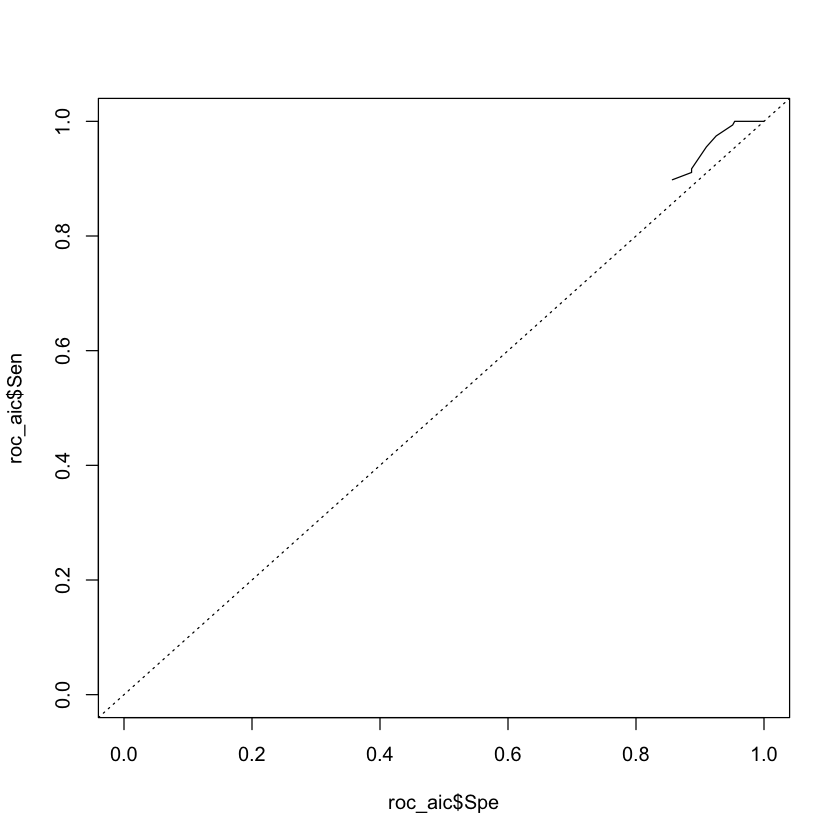

In [135]:
plot(roc_aic$Spe, roc_aic$Sen, type="l", xlim=c(0,1), ylim=c(0,1))
abline(coef = c(0, 1), lty=3)

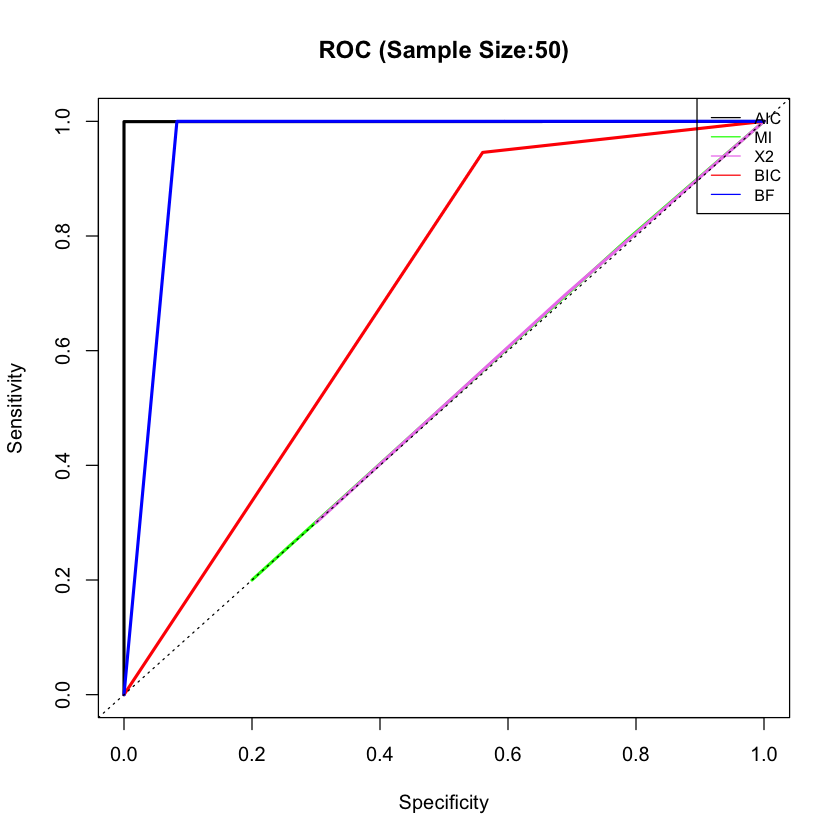

In [136]:
plot(1 - a50_005[5][[1]][[1]][4:6],a50_005[5][[1]][[1]][1:3], type="l", xlab="Specificity", 
       ylab="Sensitivity", main="ROC (Sample Size:50)", lwd=2.5)
lines(1-a50_005[5][[1]][[3]][4:6],a50_005[5][[1]][[3]][1:3], col="green", lwd=2.5)
lines(1-a50_005[5][[1]][[4]][4:6],a50_005[5][[1]][[4]][1:3], col="violet",lwd=2.5)
lines(1-a50_005[5][[1]][[2]][4:6],a50_005[5][[1]][[2]][1:3], col = "red",lwd=2.5)
lines(1-a50_005[5][[1]][[5]][4:6],a50_005[5][[1]][[5]][1:3], col = "blue",lwd=2.5)
legend("topright", legend=c("AIC",  "MI", "X2", "BIC", "BF"),
       col=c("black", "green","violet", "red", "blue"), lty=1, cex=0.8)
abline(coef = c(0, 1), lty=3)

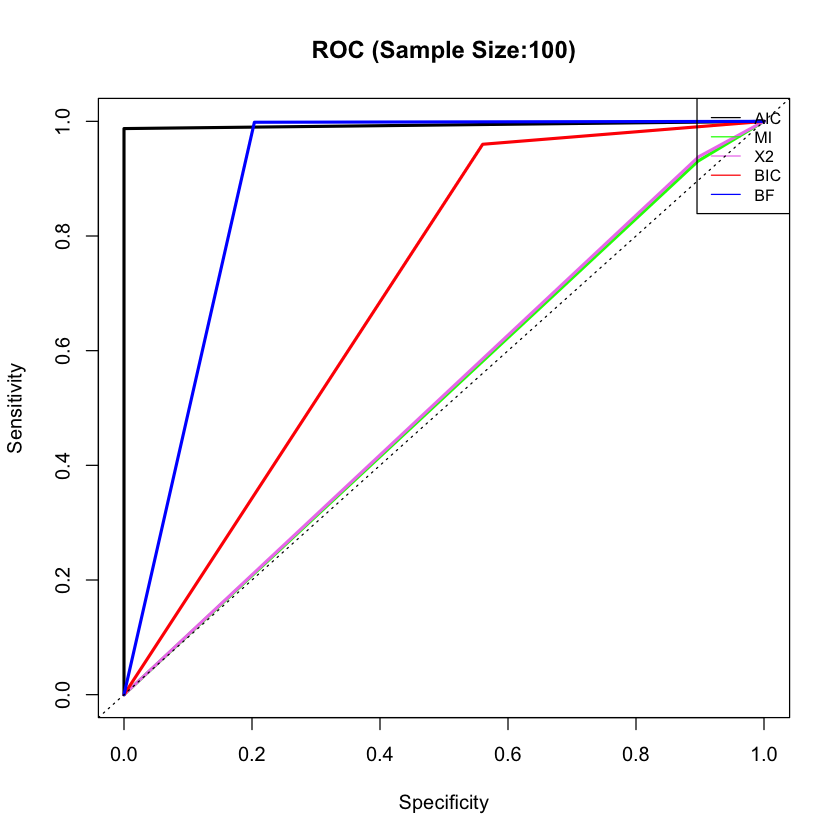

In [61]:
plot(1-a100_005[5][[1]][[1]][4:6],a100_005[5][[1]][[1]][1:3], type="l", xlab="Specificity", 
       ylab="Sensitivity", main="ROC (Sample Size:100)",lwd=2.5)
lines(1-a100_005[5][[1]][[3]][4:6],a100_005[5][[1]][[3]][1:3], col="green",lwd=2.5)
lines(1-a100_005[5][[1]][[4]][4:6],a100_005[5][[1]][[4]][1:3], col="violet",lwd=2.5)
lines(1-a100_005[5][[1]][[2]][4:6],a100_005[5][[1]][[2]][1:3], col = "red",lwd=2.5)
lines(1-a100_005[5][[1]][[5]][4:6],a100_005[5][[1]][[5]][1:3], col = "blue",lwd=2.5)
legend("topright", legend=c("AIC",  "MI", "X2", "BIC", "BF"),
       col=c("black", "green","violet", "red", "blue"), lty=1, cex=0.8)
abline(coef = c(0, 1), lty=3)

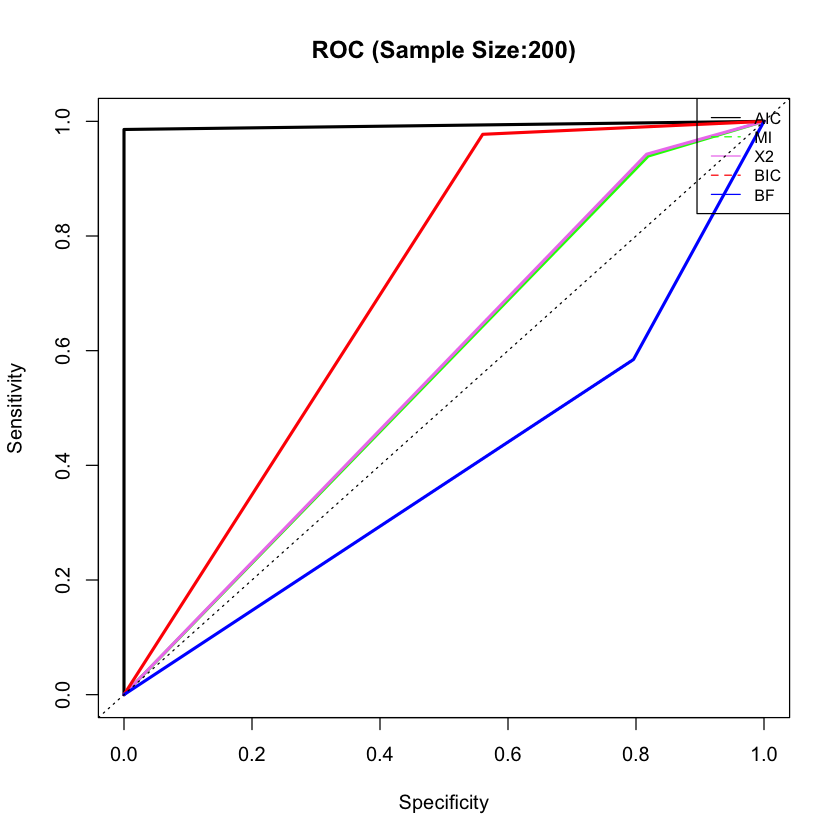

In [62]:
plot(1-a200[5][[1]][[1]][4:6],a200[5][[1]][[1]][1:3], type="l", xlab="Specificity", 
       ylab="Sensitivity", main="ROC (Sample Size:200)",lwd=2.5)
lines(1-a200[5][[1]][[3]][4:6],a200[5][[1]][[3]][1:3], col="green",lwd=2.5)
lines(1-a200[5][[1]][[4]][4:6],a200[5][[1]][[4]][1:3], col="violet",lwd=2.5)
lines(1-a200[5][[1]][[2]][4:6],a200[5][[1]][[2]][1:3], col = "red",lwd=2.5)
lines(1-a200[5][[1]][[5]][4:6],a200[5][[1]][[5]][1:3], col = "blue",lwd=2.5)
legend("topright", legend=c("AIC",  "MI", "X2", "BIC", "BF"),
       col=c("black", "green","violet", "red", "blue"), lty=1:2, cex=0.8)
abline(coef = c(0, 1), lty=3)

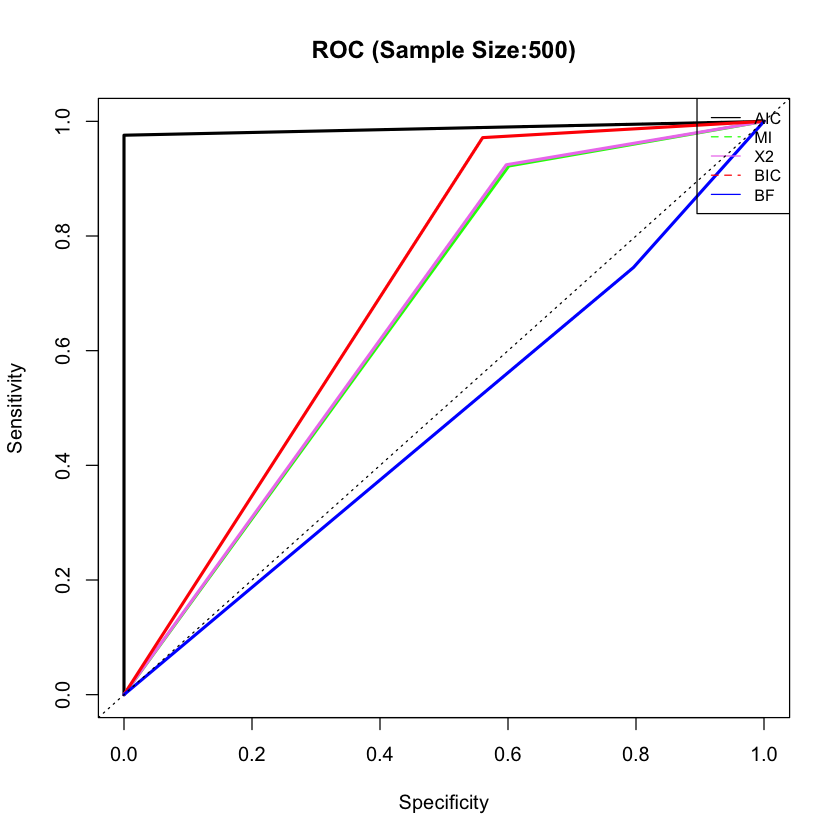

In [63]:
plot(1-a500[5][[1]][[1]][4:6],a500[5][[1]][[1]][1:3], type="l", xlab="Specificity", 
       ylab="Sensitivity", main="ROC (Sample Size:500)",lwd=2.5)
lines(1-a500[5][[1]][[3]][4:6],a500[5][[1]][[3]][1:3], col="green",lwd=2.5)
lines(1-a500[5][[1]][[4]][4:6],a500[5][[1]][[4]][1:3], col="violet",lwd=2.5)
lines(1-a500[5][[1]][[2]][4:6],a500[5][[1]][[2]][1:3], col = "red",lwd=2.5)
lines(1-a500[5][[1]][[5]][4:6],a500[5][[1]][[5]][1:3], col = "blue",lwd=2.5)
legend("topright", legend=c("AIC",  "MI", "X2", "BIC", "BF"),
       col=c("black", "green","violet", "red", "blue"), lty=1:2, cex=0.8)
abline(coef = c(0, 1), lty=3)

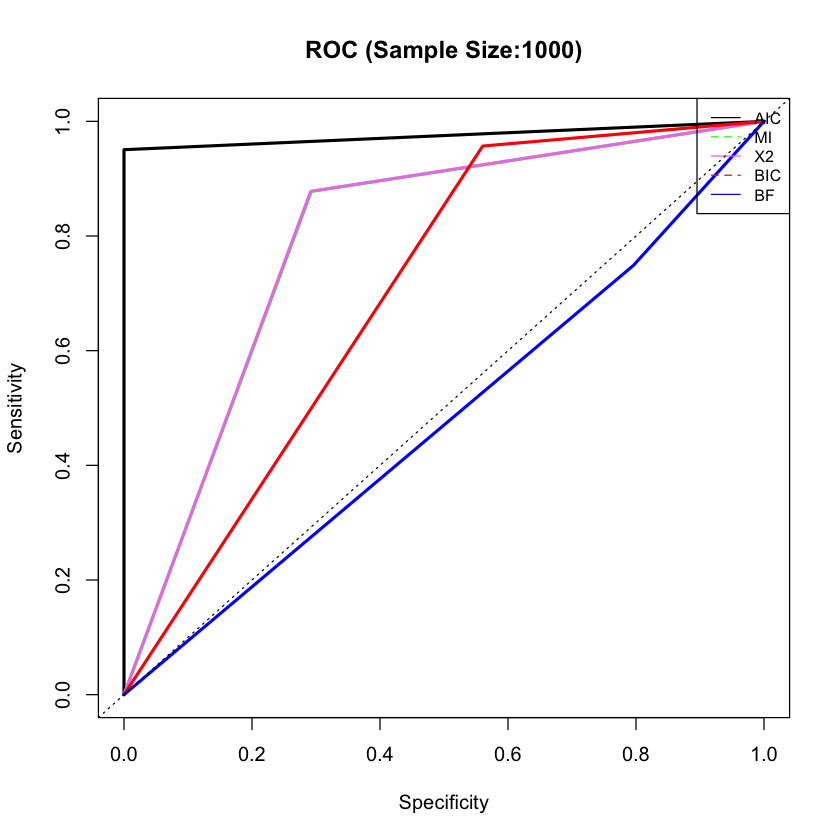

In [64]:
plot(1-a1000[5][[1]][[1]][4:6],a1000[5][[1]][[1]][1:3], type="l", xlab="Specificity", 
       ylab="Sensitivity", main="ROC (Sample Size:1000)",lwd=2.5)
lines(1-a1000[5][[1]][[3]][4:6],a1000[5][[1]][[3]][1:3], col="green",lwd=2.5)
lines(1-a1000[5][[1]][[4]][4:6],a1000[5][[1]][[4]][1:3], col="violet",lwd=2.5)
lines(1-a1000[5][[1]][[2]][4:6],a1000[5][[1]][[2]][1:3], col = "red",lwd=2.5)
lines(1-a1000[5][[1]][[5]][4:6],a1000[5][[1]][[5]][1:3], col = "blue",lwd=2.5)
legend("topright", legend=c("AIC",  "MI", "X2", "BIC", "BF"),
       col=c("black", "green","violet", "red", "blue"), lty=1:2, cex=0.8)
abline(coef = c(0, 1), lty=3)

In [68]:
a50[5][[1]][[3]]

[1] 1.0000000 0.9321053 0.0000000 0.0000000 0.1012739 1.0000000

In [146]:
acc_aic<- c(a50_01[[1]][1],a100_01[[1]][1], a200_01[[1]][1], a1000_01[[1]][1])
acc_bic<- c(a50_01[[1]][2],a100_01[[1]][2], a200_01[[1]][2], a1000_01[[1]][2])
acc_mi<- c(a50_01[[1]][3],a100_01[[1]][3], a200_01[[1]][3], a1000_01[[1]][3])
acc_x2 <- c(a50_01[[1]][4],a100_01[[1]][4], a200_01[[1]][4], a1000_01[[1]][4])
acc_bf <- c(a50_01[[1]][5],a100_01[[1]][5], a200_01[[1]][5], a1000_01[[1]][5])
siz <- c(50,100,200,1000)

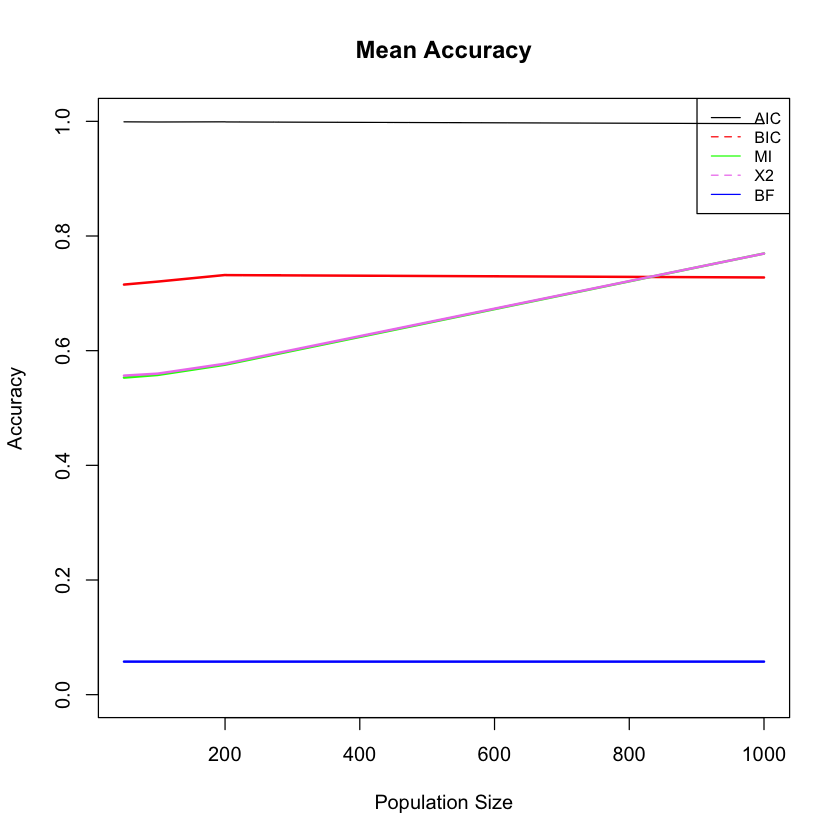

In [147]:
plot(siz,acc_aic, type="l", ylim=c(0,1), ylab="Accuracy", xlab="Population Size", main ="Mean Accuracy")
lines(siz,acc_bic, col = "red", lwd=2)
lines(siz,acc_mi, col = "green", lwd=2)
lines(siz,acc_x2, col = "violet", lwd=2)
lines(siz,acc_bf, col = "blue", lwd=2)
legend("topright", legend=c("AIC", "BIC", "MI", "X2", "BF"),
       col=c("black", "red", "green","violet", "blue"), lty=1:2, cex=0.8)

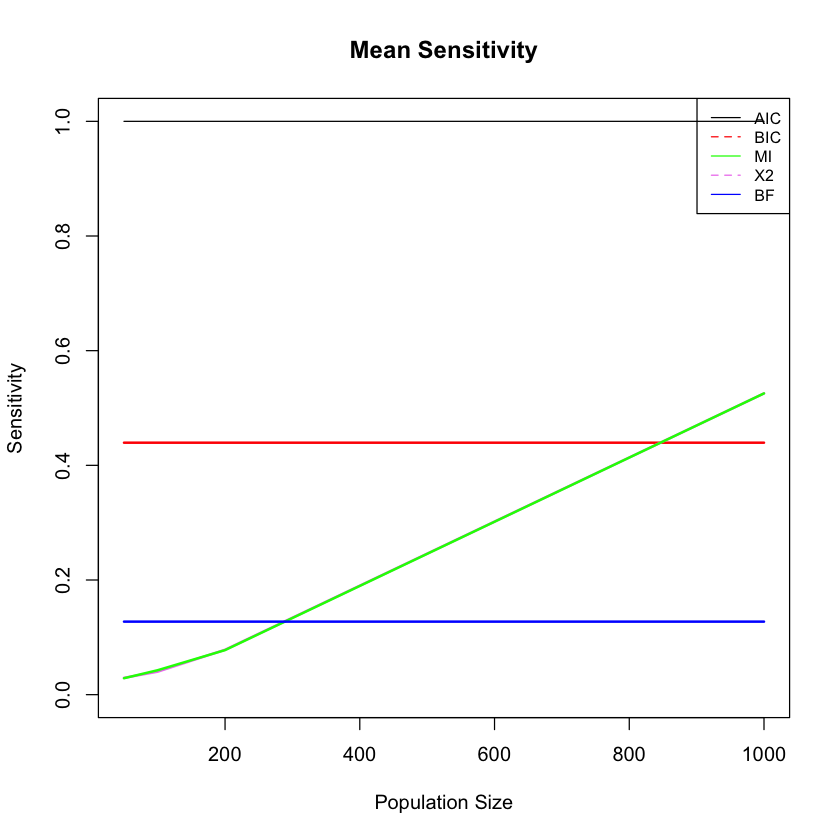

In [148]:
sen_aic<- c(a50_01[[2]][1],a100_01[[2]][1], a200_01[[2]][1], a1000_01[[2]][1])
sen_bic<- c(a50_01[[2]][2],a100_01[[2]][2], a200_01[[2]][2], a1000_01[[2]][2])
sen_mi<- c(a50_01[[2]][3],a100_01[[2]][3], a200_01[[2]][3], a1000_01[[2]][3])
sen_x2 <- c(a50_01[[2]][4],a100_01[[2]][4], a200_01[[2]][4], a1000_01[[2]][4])
sen_bf <- c(a50_01[[2]][5],a100_01[[2]][5], a200_01[[2]][5], a1000_01[[2]][5])

plot(siz,sen_aic, type="l", ylim=c(0,1), ylab="Sensitivity", xlab="Population Size", main ="Mean Sensitivity")
lines(siz,sen_bic, col = "red", lwd=2)
lines(siz,sen_x2, col = "violet", lwd=2)
lines(siz,sen_mi, col = "green", lwd=2)
lines(siz,sen_bf, col = "blue", lwd=2)
legend("topright", legend=c("AIC", "BIC", "MI", "X2", "BF"),
       col=c("black", "red", "green","violet", "blue"), lty=1:2, cex=0.8)

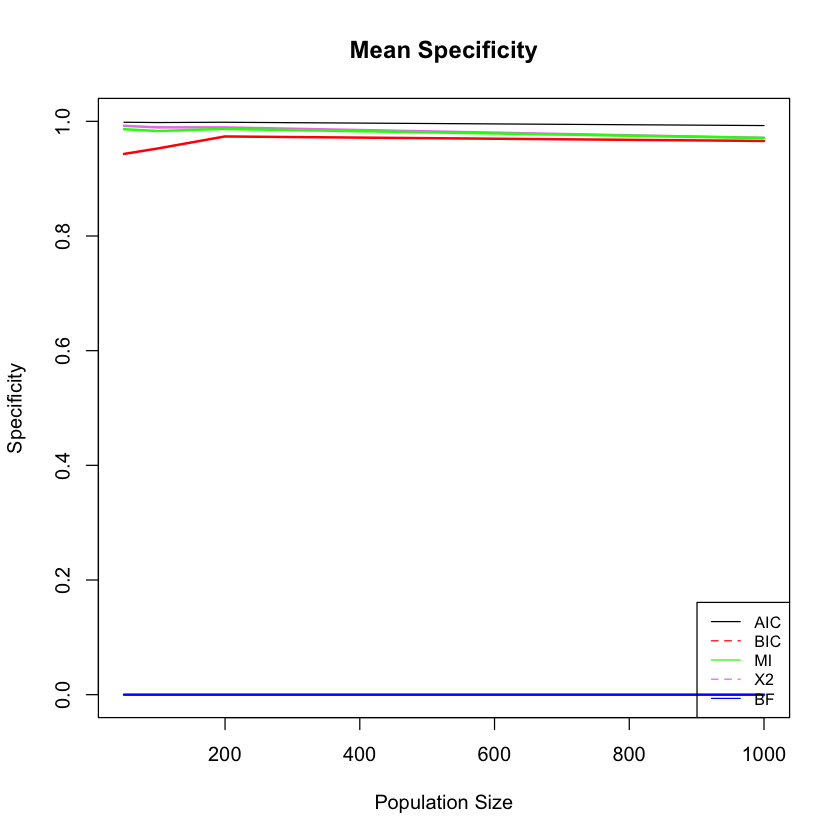

In [149]:
spe_aic<- c(a50_01[[3]][1],a100_01[[3]][1], a200_01[[3]][1], a1000_01[[3]][1])
spe_bic<- c(a50_01[[3]][2],a100_01[[3]][2], a200_01[[3]][2], a1000_01[[3]][2])
spe_mi<- c(a50_01[[3]][3],a100_01[[3]][3], a200_01[[3]][3], a1000_01[[3]][3])
spe_x2 <- c(a50_01[[3]][4],a100_01[[3]][4], a200_01[[3]][4], a1000_01[[3]][4])
spe_bf <- c(a50_01[[3]][5],a100_01[[3]][5], a200_01[[3]][5], a1000_01[[3]][5])

plot(siz,spe_aic, type="l", ylim=c(0,1), ylab="Specificity", xlab="Population Size", main ="Mean Specificity")
lines(siz,spe_bic, col = "red", lwd=2)
lines(siz,spe_x2, col = "violet", lwd=2)
lines(siz,spe_mi, col = "green", lwd=2)
lines(siz,spe_bf, col = "blue", lwd=2)
legend("bottomright", legend=c("AIC", "BIC", "MI", "X2", "BF"),
       col=c("black", "red", "green","violet", "blue"), lty=1:2, cex=0.8)

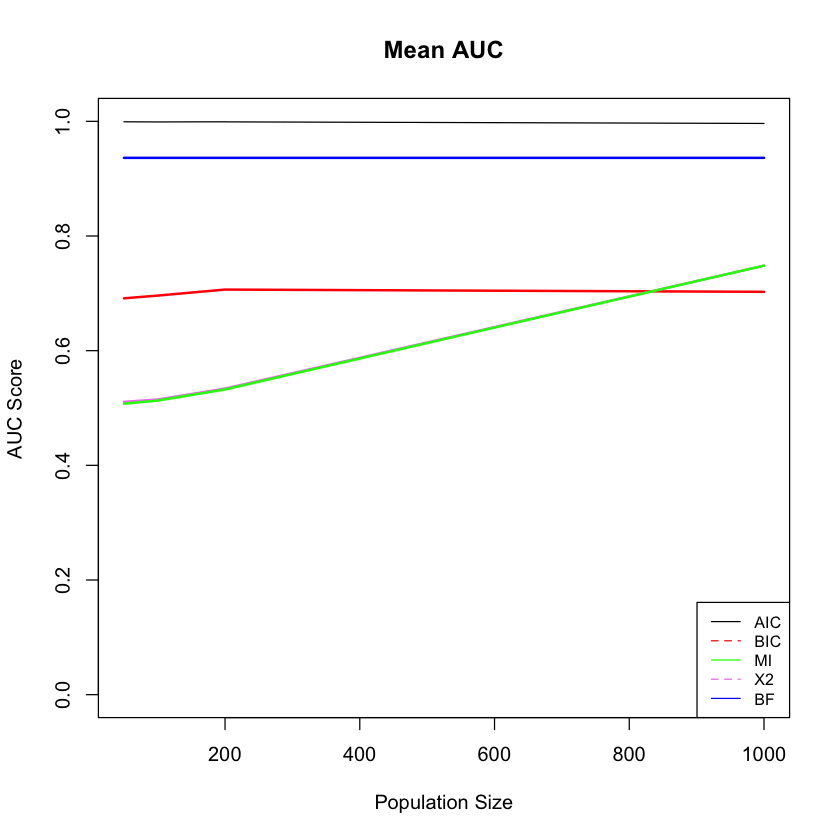

In [150]:
auc_aic<- c(a50_01[[4]][1],a100_01[[4]][1], a200_01[[4]][1], a1000_01[[4]][1])
auc_bic<- c(a50_01[[4]][2],a100_01[[4]][2], a200_01[[4]][2], a1000_01[[4]][2])
auc_mi<- c(a50_01[[4]][3],a100_01[[4]][3], a200_01[[4]][3], a1000_01[[4]][3])
auc_x2 <- c(a50_01[[4]][4],a100_01[[4]][4], a200_01[[4]][4], a1000_01[[4]][4])
auc_bf <- c(a50_01[[4]][5],a100_01[[4]][5], a200_01[[4]][5], a1000_01[[4]][5])


plot(siz,auc_aic, type="l", ylim=c(0,1), ylab="AUC Score", xlab="Population Size", main ="Mean AUC")
lines(siz,auc_bic, col = "red", lwd=2)
lines(siz,auc_x2, col = "violet", lwd=2)
lines(siz,auc_mi, col = "green", lwd=2)
lines(siz,auc_bf, col = "blue", lwd=2)
legend("bottomright", legend=c("AIC", "BIC", "MI", "X2", "BF"),
       col=c("black", "red", "green","violet", "blue"), lty=1:2, cex=0.8)

In [43]:
mean(mi_accuracy[,1], na.rm=TRUE)

ERROR: Error in mean(mi_accuracy[, 1], na.rm = TRUE): object 'mi_accuracy' not found


In [117]:
mean(as.numeric(mi_accuracy), na.rm=TRUE)

[1] 0.5711816

In [137]:

aic_accuracy = list()
aic_sensitivity = list()
aic_specificity = list()
aic_roc = list()
aic_auc = list()

bic_accuracy = list()
bic_sensitivity = list()
bic_specificity = list()
bic_roc = list()
bic_auc = list()

x2_accuracy = list()
x2_sensitivity = list()
x2_specificity = list()
x2_roc = list()
x2_auc = list()

mi_accuracy = list()
mi_sensitivity = list()
mi_specificity = list()
mi_roc = list()
mi_auc = list()


for (i in 1:10){

simdat <- CDM::sim.din(N=200,
                        QMat, guess = guess, slip = guess,
                        Sigma=sigma, rule="DINA")

obs<-simdat$dat
colnames(obs) <- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20")
obsdf<- as.data.frame(lapply(as.data.frame(obs),factor))


## This block needs some code cleaning
fulldat <- cbind(simdat$dat, simdat$alpha)
colnames(fulldat)<- c("x1", "x2", "x3","x4", "x5",
                    "x6", "x7", "x8", "x9", "x10",
                    "x11", "x12", "x13", "x14", "x15",
                    "x16", "x17", "x18", "x19", "x20",
                    "a1", "a2","a3","a4","a5")
#fulldat[, colnames(fulldat)] = lapply(fulldat[, colnames(fulldat)], as.factor)
fdf <- as.data.frame(fulldat)
factoreddata <- data.frame(lapply(fdf, factor))

rownames(QMat) <- colnames(obsdf)
colnames(QMat) <- c("a1", "a2", "a3", "a4", "a5")
items <- rownames(QMat)

skills <- colnames(QMat)

itemnames <- rownames(QMat)
itemcomb <- t(combn(itemnames,2))

a = check_ind()

res = as.data.frame(a[1])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_x2 <- data.frame(trues,preds)
colnames(cdf_x2) <- c("true_val", "pred_val")

res = as.data.frame(a[2])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_mi <- data.frame(trues,preds)
colnames(cdf_mi) <- c("true_val", "pred_val")

res = as.data.frame(a[3])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_aic <- data.frame(trues,preds)
colnames(cdf_aic) <- c("true_val", "pred_val")

res = as.data.frame(a[4])
trues<- as.data.frame(factor(res[,1], levels = c('1','0')))
preds<- as.data.frame(factor(res[,2], levels = c('1','0')))
cdf_bic <- data.frame(trues,preds)
colnames(cdf_bic) <- c("true_val", "pred_val")


cf_x2 <- confusionMatrix(data=cdf_x2$pred_val, reference = cdf_x2$true_val)
cf_mi <- confusionMatrix(data=cdf_mi$pred_val, reference = cdf_mi$true_val)
cf_bic <- confusionMatrix(data=cdf_bic$pred_val, reference = cdf_bic$true_val)
cf_aic <- confusionMatrix(data=cdf_aic$pred_val, reference = cdf_aic$true_val)

aic_sensitivity <- rbind(aic_sensitivity, cf_aic$byClass[1])
aic_specificity <- rbind(aic_specificity, cf_aic$byClass[2])
aic_accuracy <- rbind(aic_accuracy, cf_aic$overall[1])
aic_roc_temp <- roc(as.numeric(cdf_aic$true_val), as.numeric(cdf_aic$pred_val))
aic_roc <- rbind(aic_roc, aic_roc_temp)
aic_auc <- rbind(aic_auc,auc(aic_roc_temp))

bic_sensitivity <- rbind(bic_sensitivity, cf_bic$byClass[1])
bic_specificity <- rbind(bic_specificity, cf_bic$byClass[2])
bic_accuracy <- rbind(bic_accuracy, cf_bic$overall[1])
bic_roc_temp <- roc(as.numeric(cdf_bic$true_val), as.numeric(cdf_bic$pred_val))
bic_roc <- rbind(bic_roc, bic_roc_temp)
bic_auc <- rbind(bic_auc, auc(bic_roc_temp))

x2_sensitivity <- rbind(x2_sensitivity, cf_x2$byClass[1])
x2_specificity <- rbind(x2_specificity, cf_x2$byClass[2])
x2_accuracy <- rbind(x2_accuracy, cf_x2$overall[1])
x2_roc_temp <- roc(as.numeric(cdf_x2$true_val), as.numeric(cdf_x2$pred_val))
x2_roc <- rbind(x2_roc, x2_roc_temp)
x2_auc <- rbind(x2_auc, auc(x2_roc_temp))

mi_sensitivity <- rbind(mi_sensitivity, cf_mi$byClass[1])
mi_specificity <- rbind(mi_specificity, cf_mi$byClass[2])
mi_accuracy <- rbind(mi_accuracy, cf_mi$overall[1])
mi_roc_temp <- roc(as.numeric(cdf_mi$true_val), as.numeric(cdf_mi$pred_val))
mi_roc <- rbind(mi_roc, mi_roc_temp)
mi_auc <- rbind(mi_auc, auc(mi_roc_temp))
}

mi_accuracy_mean <- mean(as.numeric(mi_accuracy), na.rm=TRUE)
mi_sensitivity_mean <- mean(as.numeric(mi_sensitivity), na.rm=TRUE)
mi_specificity_mean <- mean(as.numeric(mi_specificity), na.rm=TRUE)
#mi_roc_mean <- mean(as.numeric(mi_roc), na.rm=TRUE)
mi_auc_mean <- mean(as.numeric(mi_auc), na.rm=TRUE)

x2_accuracy_mean <- mean(as.numeric(x2_accuracy), na.rm=TRUE)
x2_sensitivity_mean <- mean(as.numeric(x2_sensitivity), na.rm=TRUE)
x2_specificity_mean <- mean(as.numeric(x2_specificity), na.rm=TRUE)
#x2_roc_mean <- mean(as.numeric(x2_roc), na.rm=TRUE)
x2_auc_mean <- mean(as.numeric(x2_auc), na.rm=TRUE)


aic_accuracy_mean <- mean(as.numeric(aic_accuracy), na.rm=TRUE)
aic_sensitivity_mean <- mean(as.numeric(aic_sensitivity), na.rm=TRUE)
aic_specificity_mean <- mean(as.numeric(aic_specificity), na.rm=TRUE)
#aic_roc_mean <- mean(as.numeric(aic_roc), na.rm=TRUE)
aic_auc_mean <- mean(as.numeric(aic_auc), na.rm=TRUE)


bic_accuracy_mean <- mean(as.numeric(bic_accuracy), na.rm=TRUE)
bic_sensitivity_mean <- mean(as.numeric(bic_sensitivity), na.rm=TRUE)
bic_specificity_mean <- mean(as.numeric(bic_specificity), na.rm=TRUE)
#bic_roc_mean <- mean(as.numeric(bic_roc), na.rm=TRUE)
bic_auc_mean <- mean(as.numeric(bic_auc), na.rm=TRUE)

accuracy_scores = list(aic_accuracy_mean, bic_accuracy_mean, mi_accuracy_mean, x2_accuracy_mean)
sensitivity_scores = list(aic_sensitivity_mean, bic_sensitivity_mean, mi_sensitivity_mean, x2_sensitivity_mean)
specificity_scores = list(aic_specificity_mean, bic_specificity_mean, mi_specificity_mean, x2_specificity_mean)
auc_scores = list(aic_auc_mean, bic_auc_mean, mi_auc_mean, x2_auc_mean)

results = list(accuracy_scores, sensitivity_scores, specificity_scores, auc_scores)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting leve

In [139]:
aic_accuracy_mean

[1] 0.6181556